# Prévision de ventes

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import warnings; warnings.simplefilter('ignore')

In [93]:
publi = pd.read_csv("C:/Users/Dell/Desktop/publi.csv", sep=";")

In [94]:
publi.head()

,ID,TV,Radio,Journaux,Ventes
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [95]:
publi.size

1000

In [96]:
publi.dtypes

ID            int64
TV          float64
Radio       float64
Journaux    float64
Ventes      float64
dtype: object

In [97]:
publi['Ventes'].head() #la variable de réponse

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Ventes, dtype: float64

# Visualisation avec Seaborn

In [98]:
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(publi)

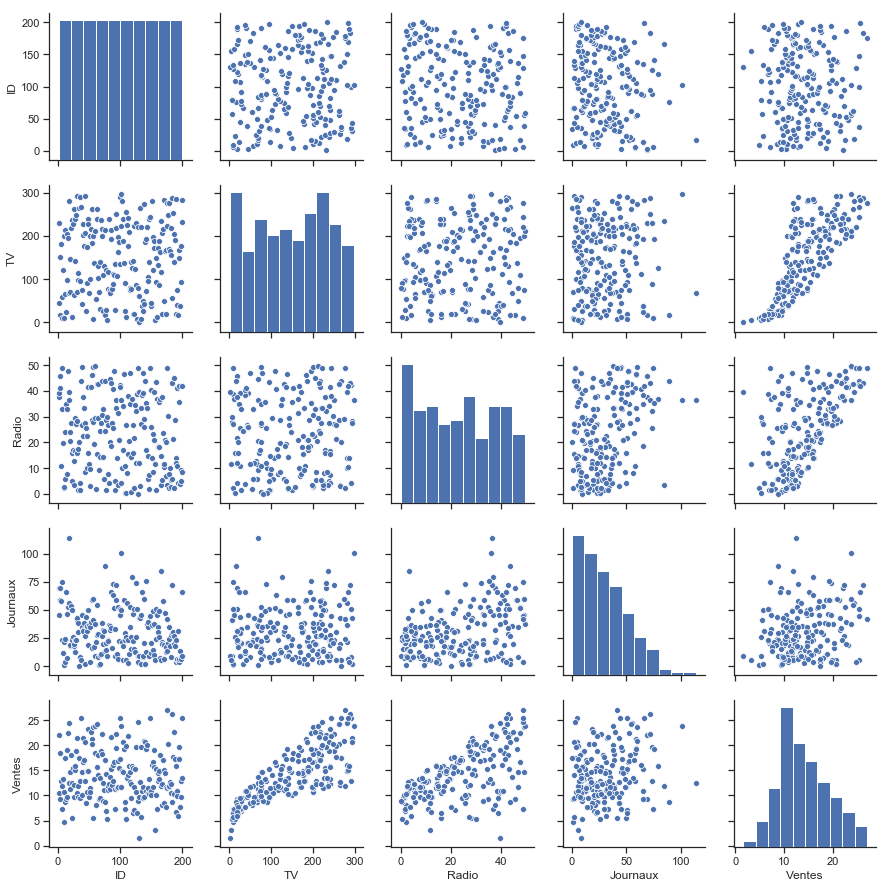

In [99]:
plt.show()

In [100]:
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(publi, kind = 'scatter')

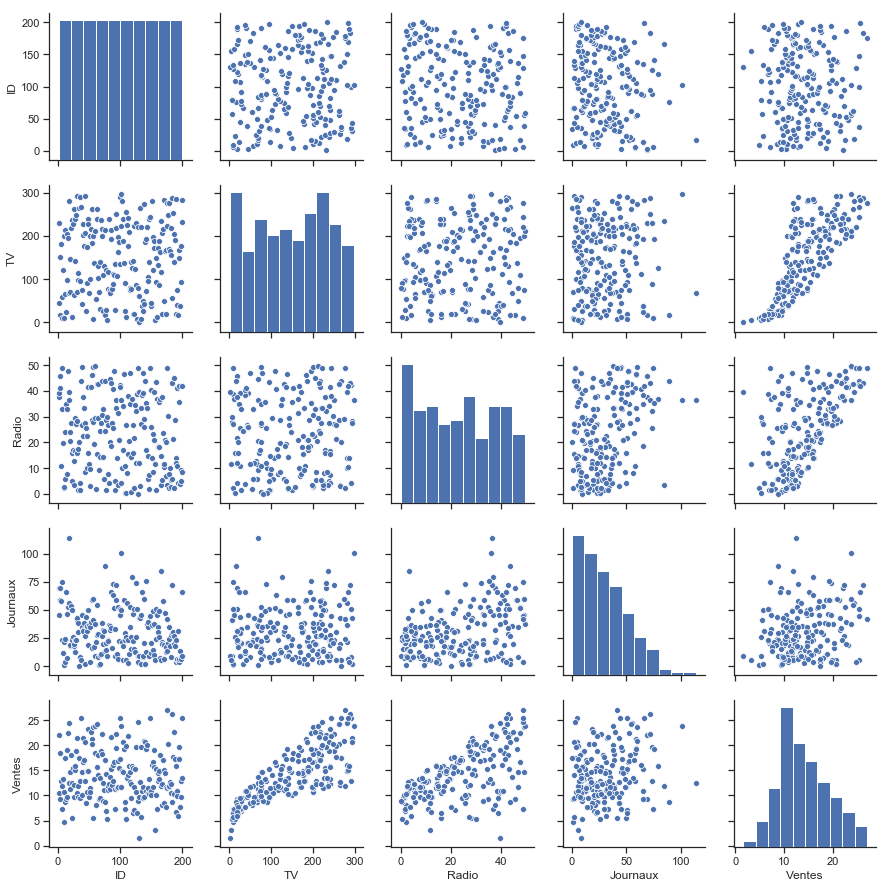

In [101]:
plt.show()

In [102]:
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(publi, kind = 'reg')

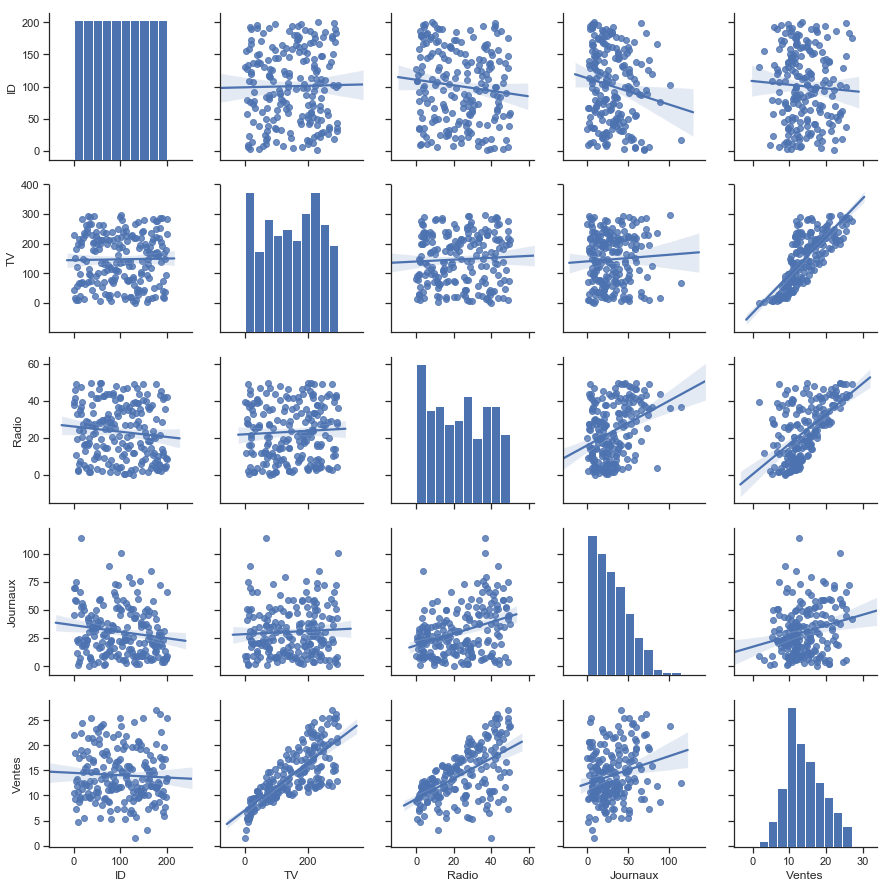

In [103]:
plt.show()

In [104]:
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(publi, kind = 'reg', x_vars = ['TV', 'Radio', 'Journaux'], y_vars = ['Ventes'])

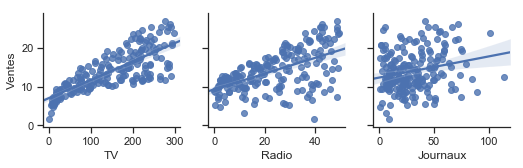

In [105]:
plt.show()

In [106]:
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(publi, kind = 'reg', x_vars = ['TV', 'Radio', 'Journaux'], y_vars = ['Ventes'], markers = '+', height = 5)

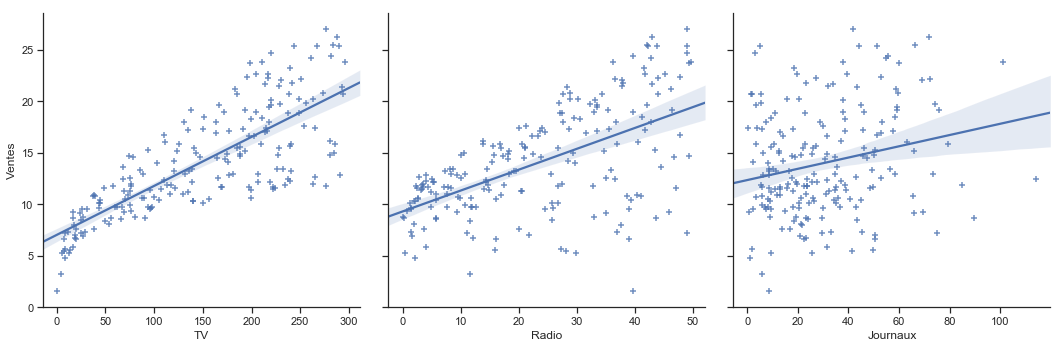

In [107]:
plt.show()

# Définition des jeux de test et d'entraînement

In [108]:
from sklearn.model_selection import train_test_split

In [137]:
X = publi[['TV', 'Radio', 'Journaux']]
y = publi['Ventes']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Application du modèle de régression

In [139]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
lr.coef_

array([0.04575482, 0.18799423])

In [141]:
lr.intercept_

2.921099912405138

In [142]:
list(zip(X, lr.coef_))

[('TV', 0.045754815101076145), ('Radio', 0.18799422662030918)]

In [152]:
# y = lr.coef_ * x + lr.intercept_

# Prévisions

In [144]:
p = lr.predict(X)
p

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [145]:
lr.score(X,y)

0.8971942610828956

In [146]:
publi.corr()

,ID,TV,Radio,Journaux,Ventes
ID,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Journaux,-0.154944,0.056648,0.354104,1.000000,0.228299
Ventes,-0.051616,0.782224,0.576223,0.228299,1.000000


# Evaluation du modèle

In [147]:
from sklearn import metrics

In [148]:
print(np.sqrt(metrics.mean_squared_error(y,p))) #RMSE

1.6687030593661931


# Prévision de location de vélos

In [151]:
bike = pd.read_csv("C:/Users/Dell/Desktop/bikeshare.csv", sep=",")
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [150]:
bike.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [165]:
bike.size

130632

In [166]:
bike['count'].head() #la variable de réponse

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

# Visualisation

In [167]:
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(bike, kind = 'scatter', x_vars = ['season', 'holiday', 'workingday', 'casual', 'registered'], y_vars = ['count'], markers = '+', height = 5)

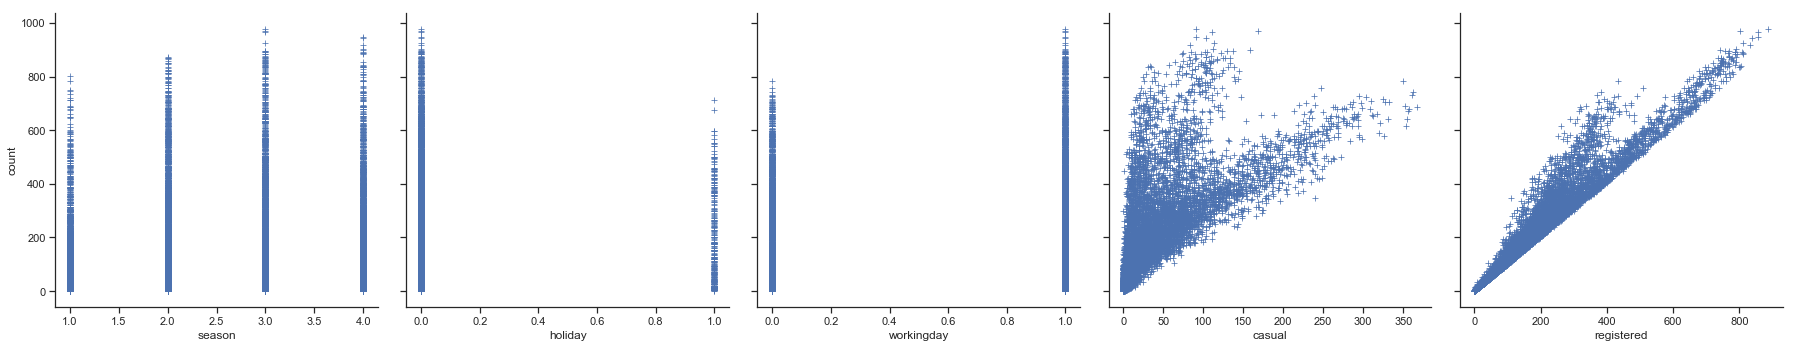

In [168]:
plt.show()

In [169]:
sns.set(style="ticks", color_codes=True)
pairplot = sns.pairplot(bike, kind = 'scatter', x_vars = ['temp', 'atemp', 'weather','windspeed', 'humidity'], y_vars = ['count'], markers = '+', height = 5)

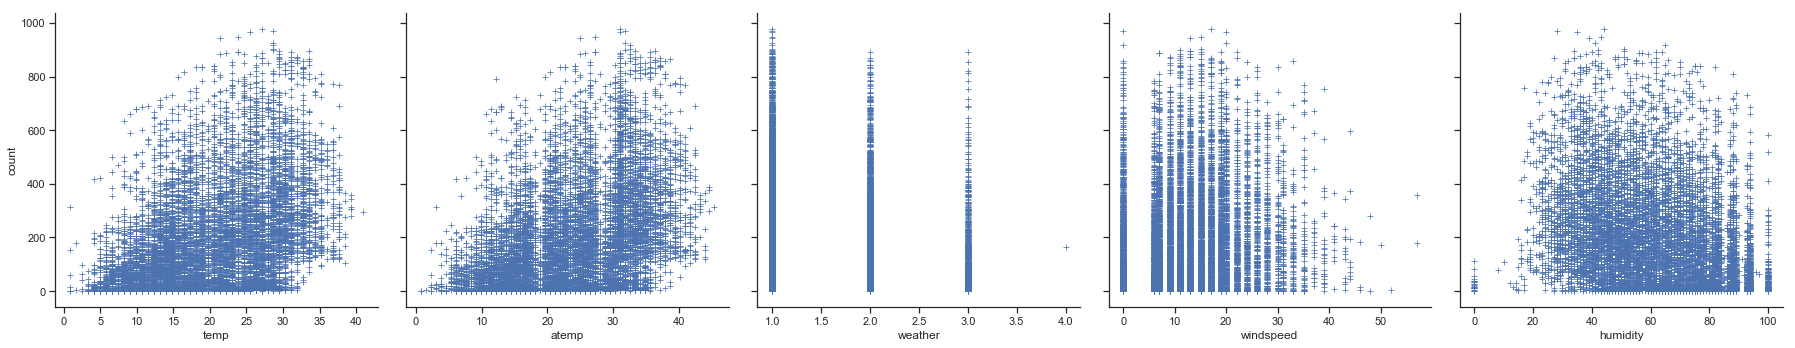

In [170]:
plt.show()

# Régression linéaire simple

In [172]:
X = bike[['temp']]
y = bike['count']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [174]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [176]:
lr.coef_

array([9.17054048])

In [177]:
lr.intercept_

6.046212959616469

In [178]:
list(zip(X, lr.coef_))

[('temp', 9.170540481426254)]

In [179]:
prevision = lr.predict(X)
prevision

array([ 96.2843313 ,  88.7644881 ,  88.7644881 , ..., 133.88354727,
       133.88354727, 126.36370408])

In [180]:
lr.score(X,y)

0.15559367802794855

In [189]:
b = bike.corr()
b

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [190]:
p1 = lr.predict([[25]])
p1

array([235.309725])

# Régression linéaire multiple

In [201]:
plt.subplots(figsize=(15,6))
sns.heatmap(b, annot = True)

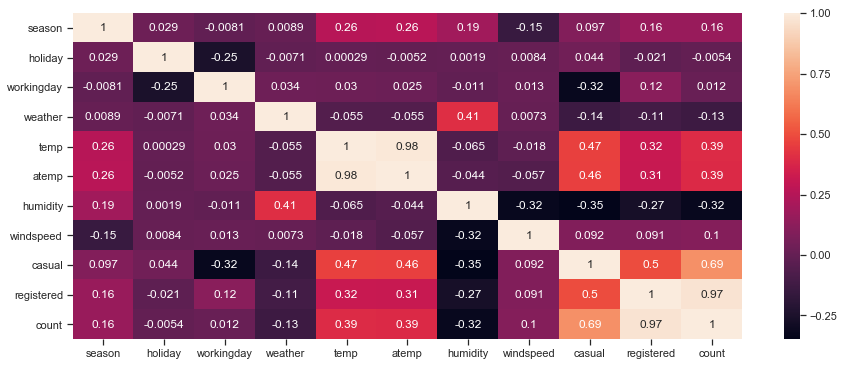

In [202]:
plt.show()

# Utilisation du train test rmse

In [203]:
print(np.sqrt(metrics.mean_squared_error(y,prevision))) #RMSE

166.44886243326746


In [212]:
X = bike[["temp","season","weather","humidity","atemp"]]
y = bike['count']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [214]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [215]:
lr.coef_

array([ 2.64719803, 22.32958394,  7.38023014, -3.1698383 ,  4.87299197])

In [216]:
lr.intercept_

152.47810701943422

In [217]:
list(zip(X, lr.coef_))

[('temp', 2.64719803239518),
 ('season', 22.329583935871867),
 ('weather', 7.380230143705471),
 ('humidity', -3.16983829658077),
 ('atemp', 4.872991968332684)]

In [218]:
prevision = lr.predict(X)
prevision

array([ 21.6261671 ,  18.92182911,  18.92182911, ..., 170.2477796 ,
       177.63036243, 155.90699467])

In [219]:
lr.score(X,y)

0.2598215881956899

In [220]:
print(np.sqrt(metrics.mean_squared_error(y,prevision))) #RMSE

155.8379765026408


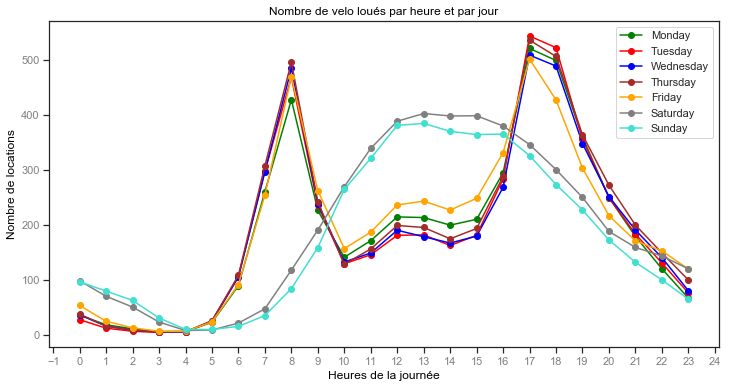

In [222]:
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike["day"] = bike['datetime'].dt.day
bike["hour"] = bike['datetime'].dt.hour

from datetime import date
import calendar
bike["dayofweek"] = bike.datetime.apply(lambda x: calendar.day_name[x.weekday()])
monday = bike.loc[bike["dayofweek"] == "Monday"]
tuesday = bike.loc[bike["dayofweek"] == "Tuesday"]
wednesday = bike.loc[bike["dayofweek"] == "Wednesday"]
thursday = bike.loc[bike["dayofweek"] == "Thursday"]
friday = bike.loc[bike["dayofweek"] == "Friday"]
saturday = bike.loc[bike["dayofweek"] == "Saturday"]
sunday = bike.loc[bike["dayofweek"] == "Sunday"]
number = monday.groupby(["hour"])["count"].mean()
number2 = tuesday.groupby(["hour"])["count"].mean()
number3 = wednesday.groupby(["hour"])["count"].mean()
number4 = thursday.groupby(["hour"])["count"].mean()
number5 = friday.groupby(["hour"])["count"].mean()
number6 = saturday.groupby(["hour"])["count"].mean()
number7 = sunday.groupby(["hour"])["count"].mean()
hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
plt.figure(figsize=(12,6))
ax = plt.plot(hour,number, color='green',marker="o",label = 'Monday')
ax1 = plt.plot(hour,number2, color='red',marker="o",label='Tuesday')
ax2 = plt.plot(hour,number3, color='blue',marker="o",label='Wednesday')
ax3 = plt.plot(hour,number4, color='brown',marker="o",label='Thursday')
ax4 = plt.plot(hour,number5, color='orange',marker="o",label='Friday')
ax5 = plt.plot(hour,number6, color='gray',marker="o",label='Saturday')
ax6 = plt.plot(hour,number7, color='turquoise',marker="o",label='Sunday')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.locator_params(axis='x',nbins=26)
plt.legend()
plt.xlabel("Heures de la journée",color="black")
plt.ylabel("Nombre de locations",color='black')
plt.title("Nombre de vélos loués par heure et par jour",color='black')
plt.show()